In [4]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import mysql.connector
import sqlalchemy as sal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
cnx = mysql.connector.connect(
    host="localhost",
    port=330,
    user="root",
    password="root")

In [12]:
query = "select * from banking_case.customer"

In [14]:
df = pd.read_sql(query, cnx)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25104\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [16]:
cnx.close()

In [18]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [20]:
df.shape

(3000, 25)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [24]:
# Check for missing values
df.isnull().sum()



ï»¿Client ID                0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [26]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [58]:
# bins = [0,100000,300000,float('inf')]
# labels = ['Low','med','High']


# df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)
# df['Income Band'].value_counts().plot(kind='bar')

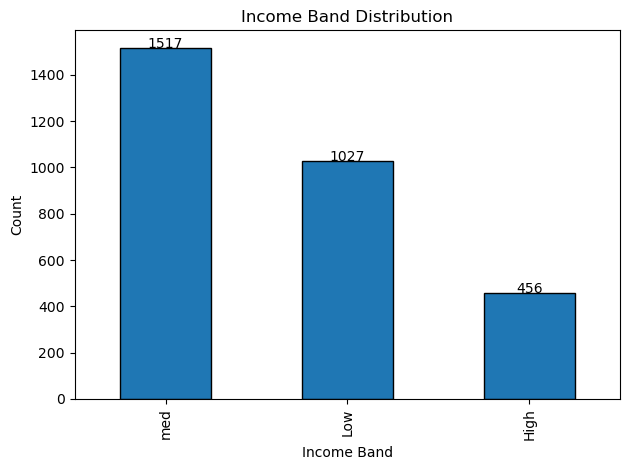

In [60]:
import matplotlib.pyplot as plt

counts = df['Income Band'].value_counts()
counts.plot(kind='bar', edgecolor='black')

# Add data labels
for i, val in enumerate(counts):
    plt.text(i, val + 1, str(val), ha='center')

plt.title('Income Band Distribution')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [34]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
    print(f"Value counts for '{col}': ")
    display(df[col].value_counts())
    print("\n") 


Value counts for 'BRId': 


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64



Value counts for 'GenderId': 


GenderId
2    1512
1    1488
Name: count, dtype: int64



Value counts for 'IAId': 


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64



Value counts for 'Amount of Credit Cards': 


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64



Value counts for 'Nationality': 


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64



Value counts for 'Occupation': 


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64



Value counts for 'Fee Structure': 


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64



Value counts for 'Loyalty Classification': 


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64



Value counts for 'Properties Owned': 


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64



Value counts for 'Risk Weighting': 


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64



Value counts for 'Income Band': 


Income Band
med     1517
Low     1027
High     456
Name: count, dtype: int64

## Univariate Analysis

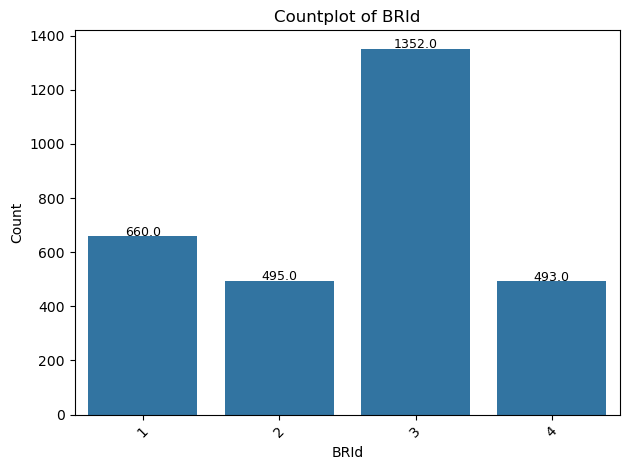

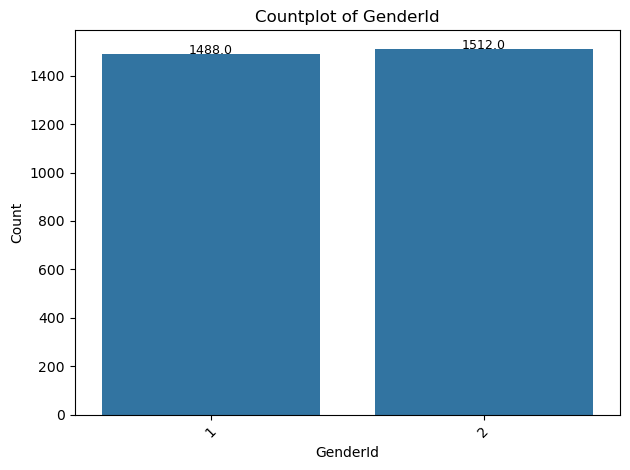

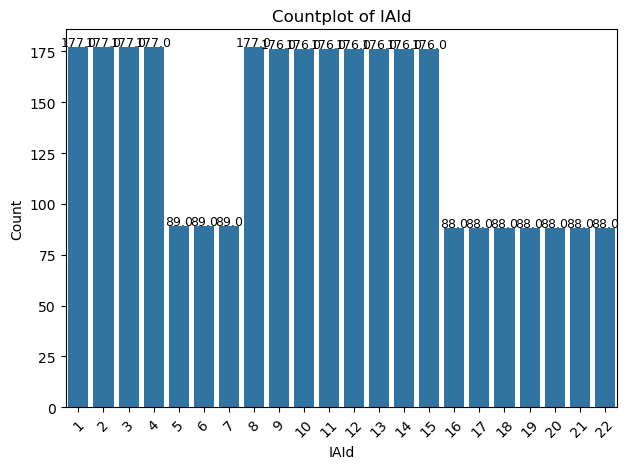

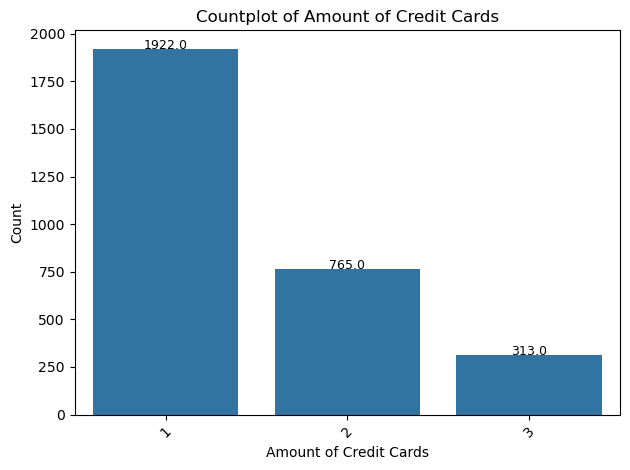

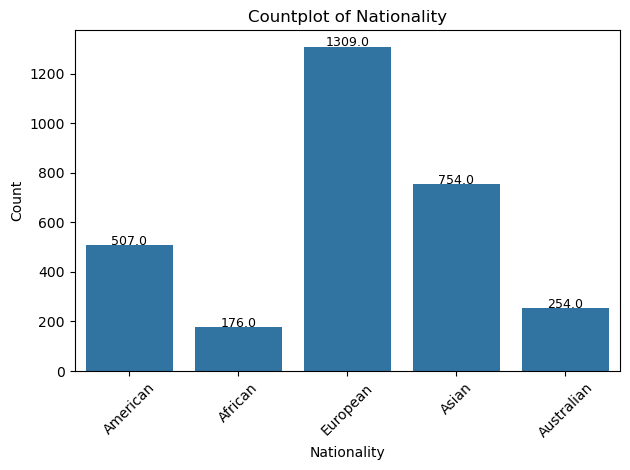

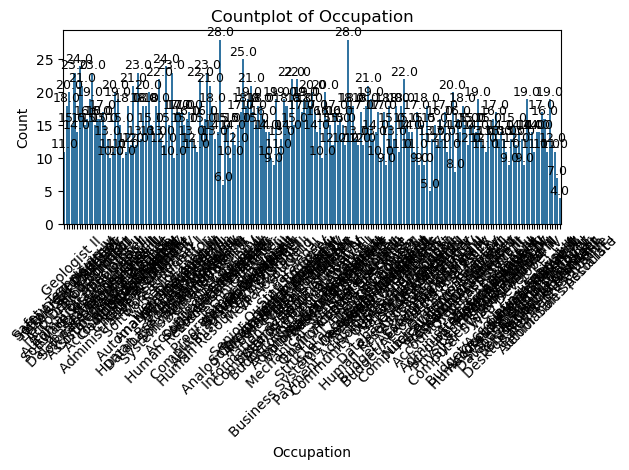

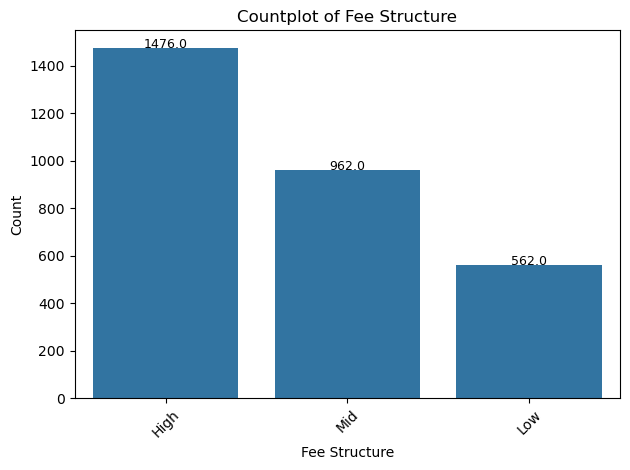

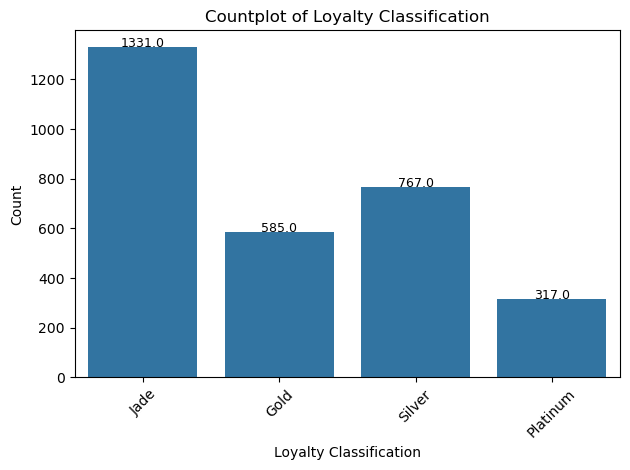

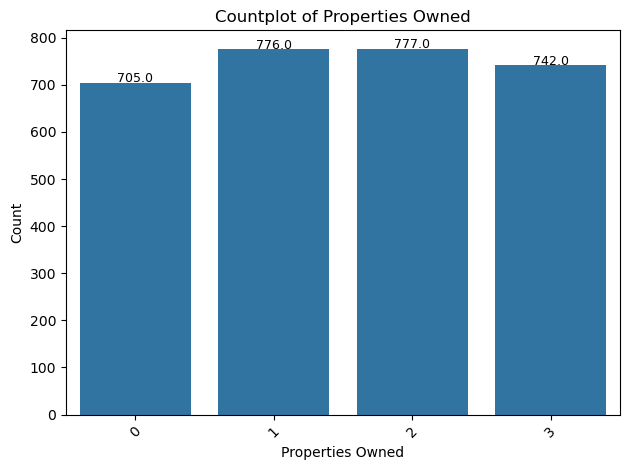

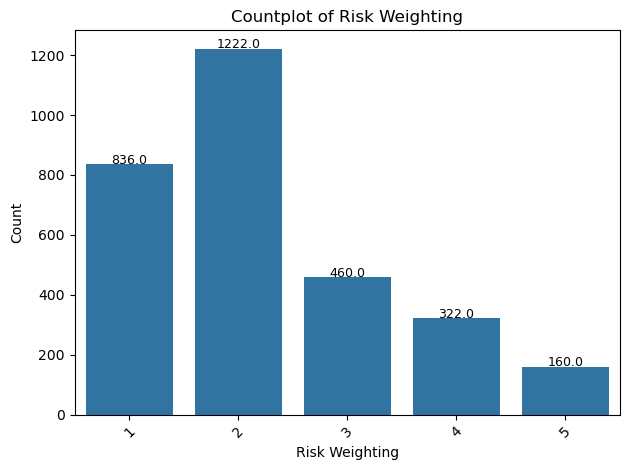

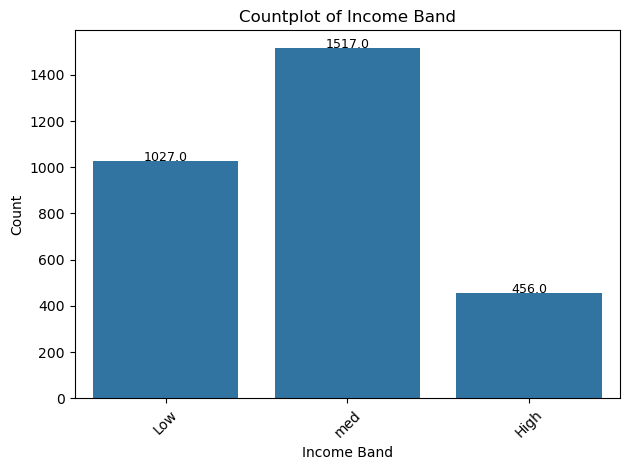

In [63]:
for i, a in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    ax = sns.countplot(data=df, x=a)
    
    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, str(height), ha='center', fontsize=9)

    plt.title(f'Countplot of {a}')
    plt.xlabel(a)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [65]:
# for i, a in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
#     plt.figure(i)
#     sns.countplot(data=df, x=a)

## Bivariate Analysis

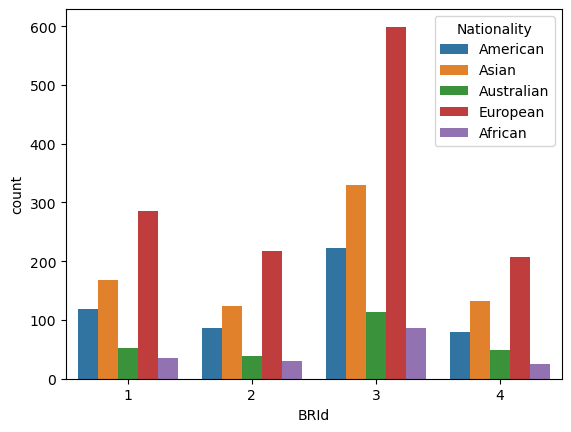

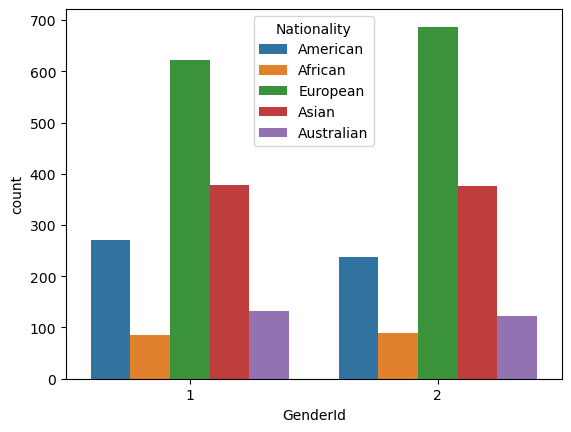

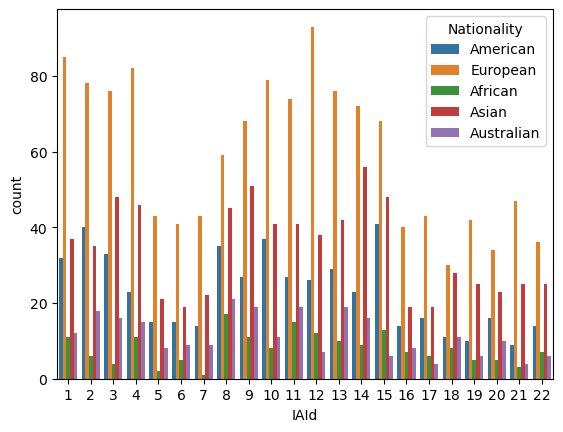

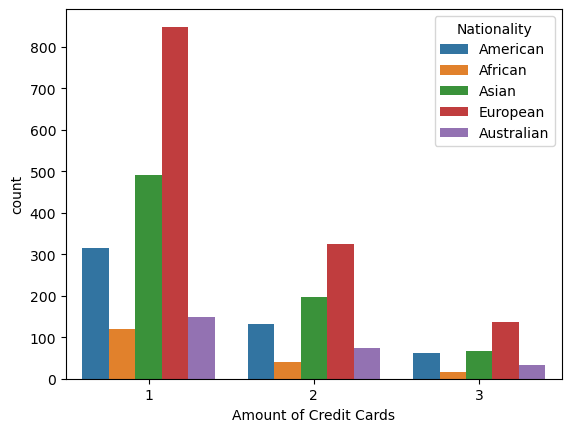

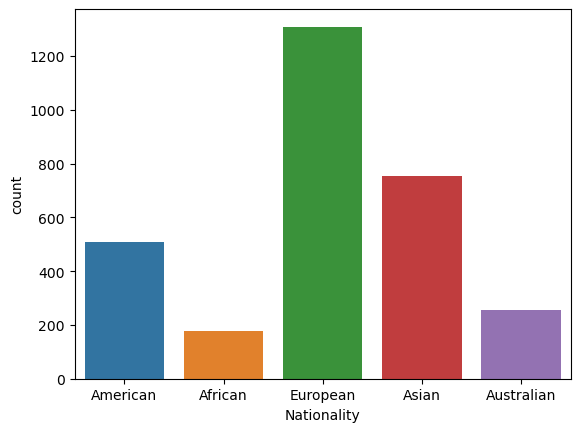

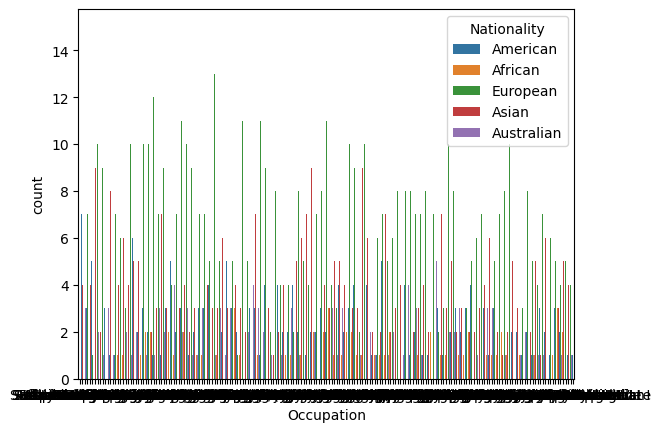

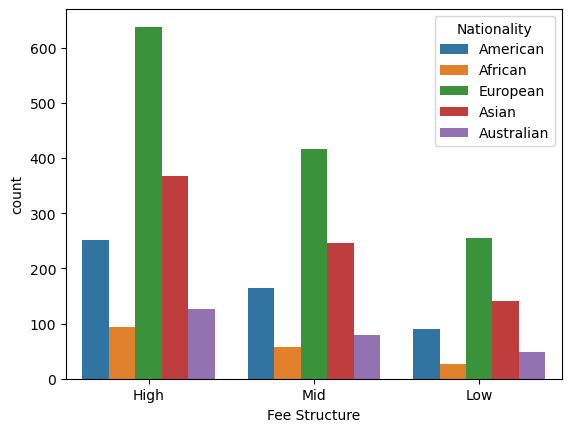

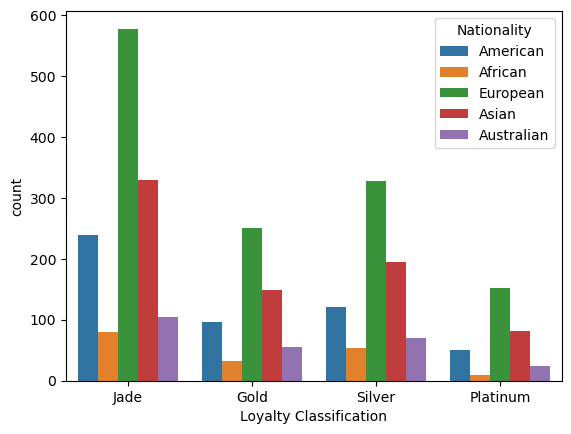

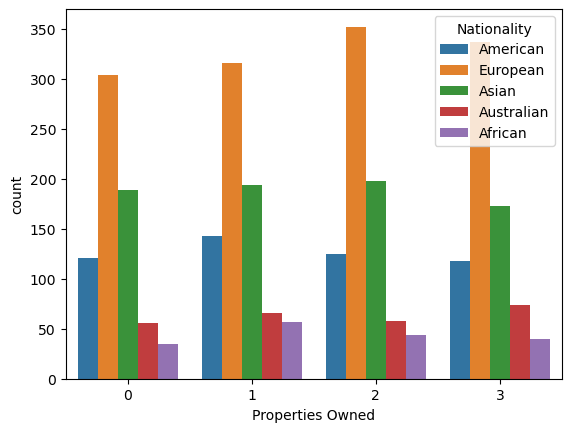

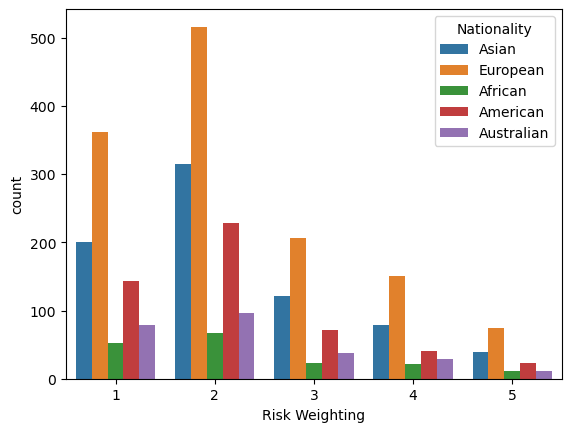

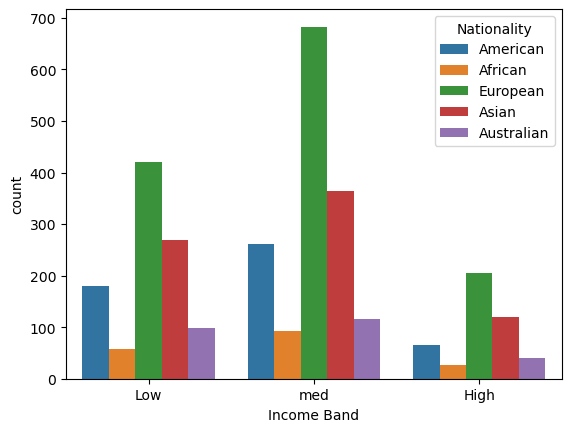

In [39]:
for i, a in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=a, hue='Nationality')

In [52]:
# # Histplot of value counts for different Occupation

# for col in categorical_cols:
#     if col == 'Occupation':
#         continue
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[col])
    
#     plt.title('Histogram of Occupation Count')
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.show()

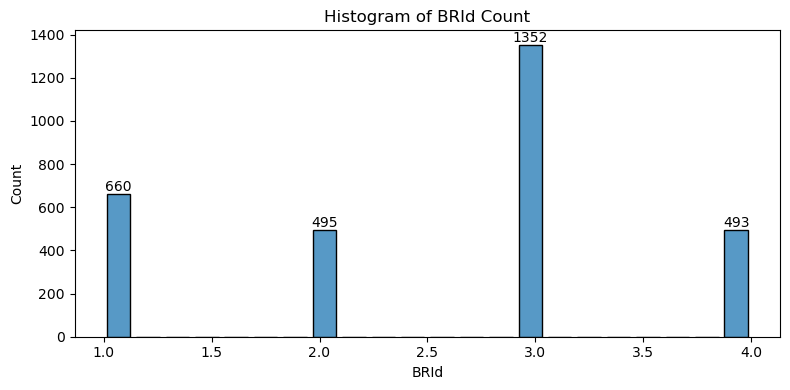

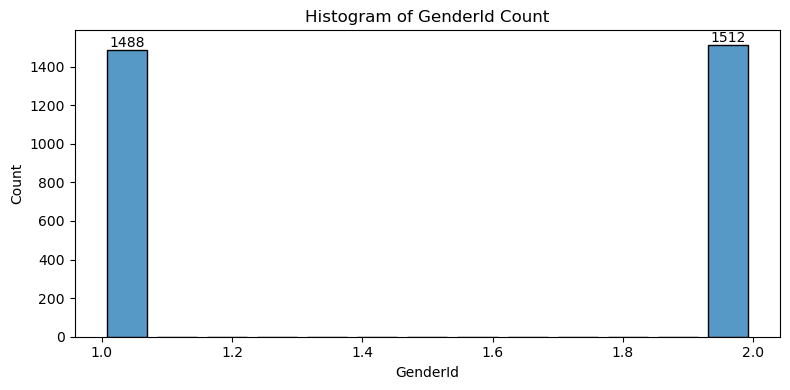

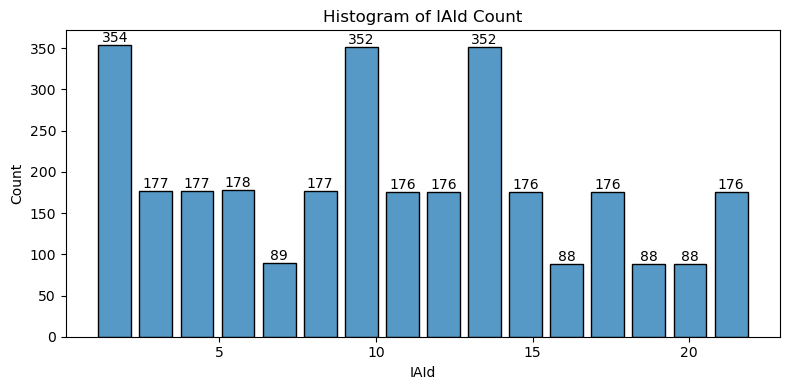

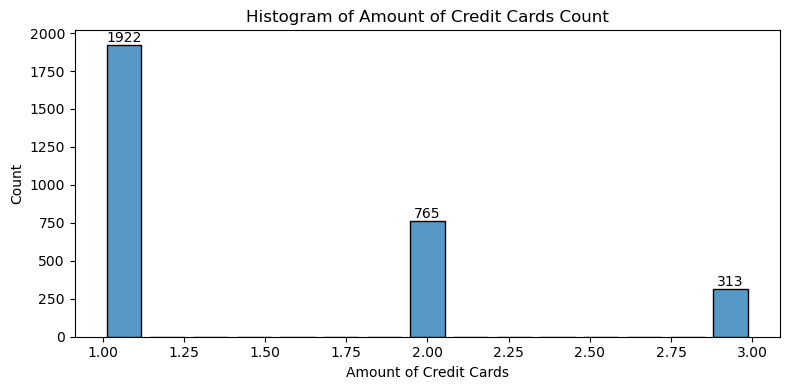

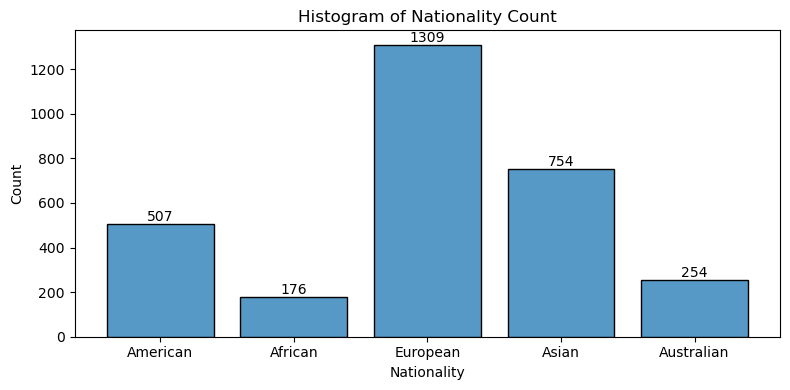

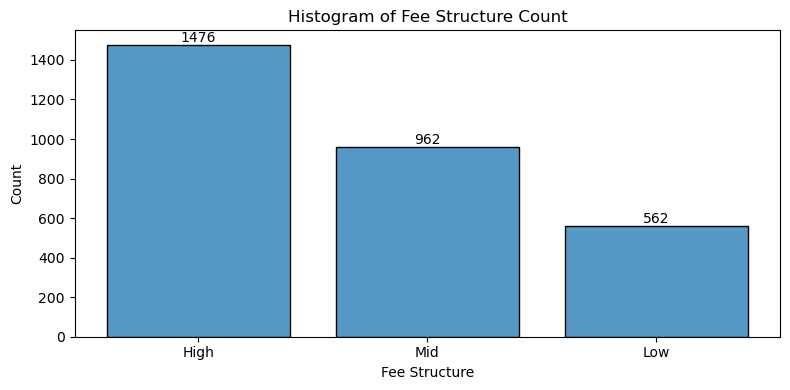

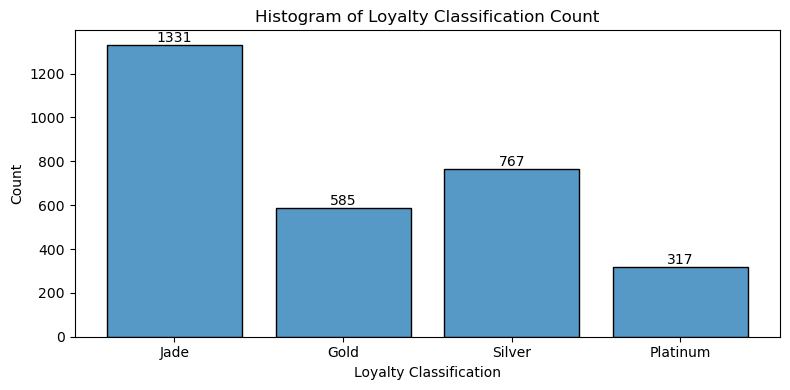

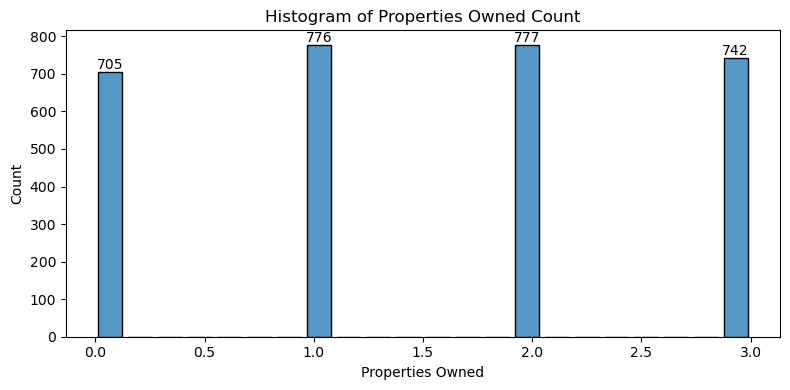

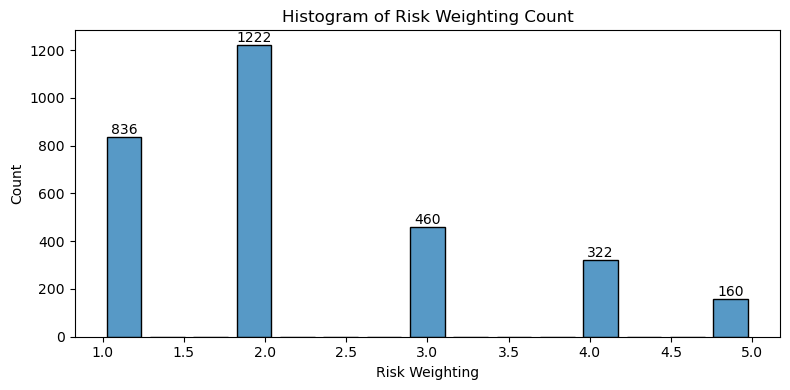

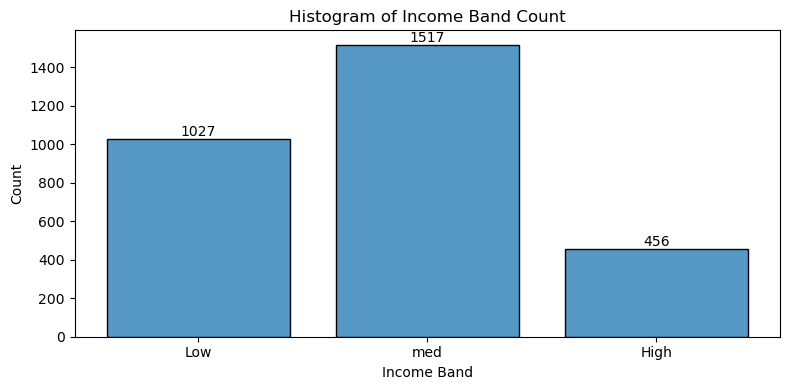

In [54]:
#Histplot of value counts for different Occupation
for col in categorical_cols:
    if col == 'Occupation':
        continue
    plt.figure(figsize=(8, 4))
    
    ax = sns.histplot(df[col], shrink=0.8)  # Save the plot to 'ax'
    
    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(str(int(height)),
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom')
    
    plt.title(f'Histogram of {col} Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## Numerical Analysis

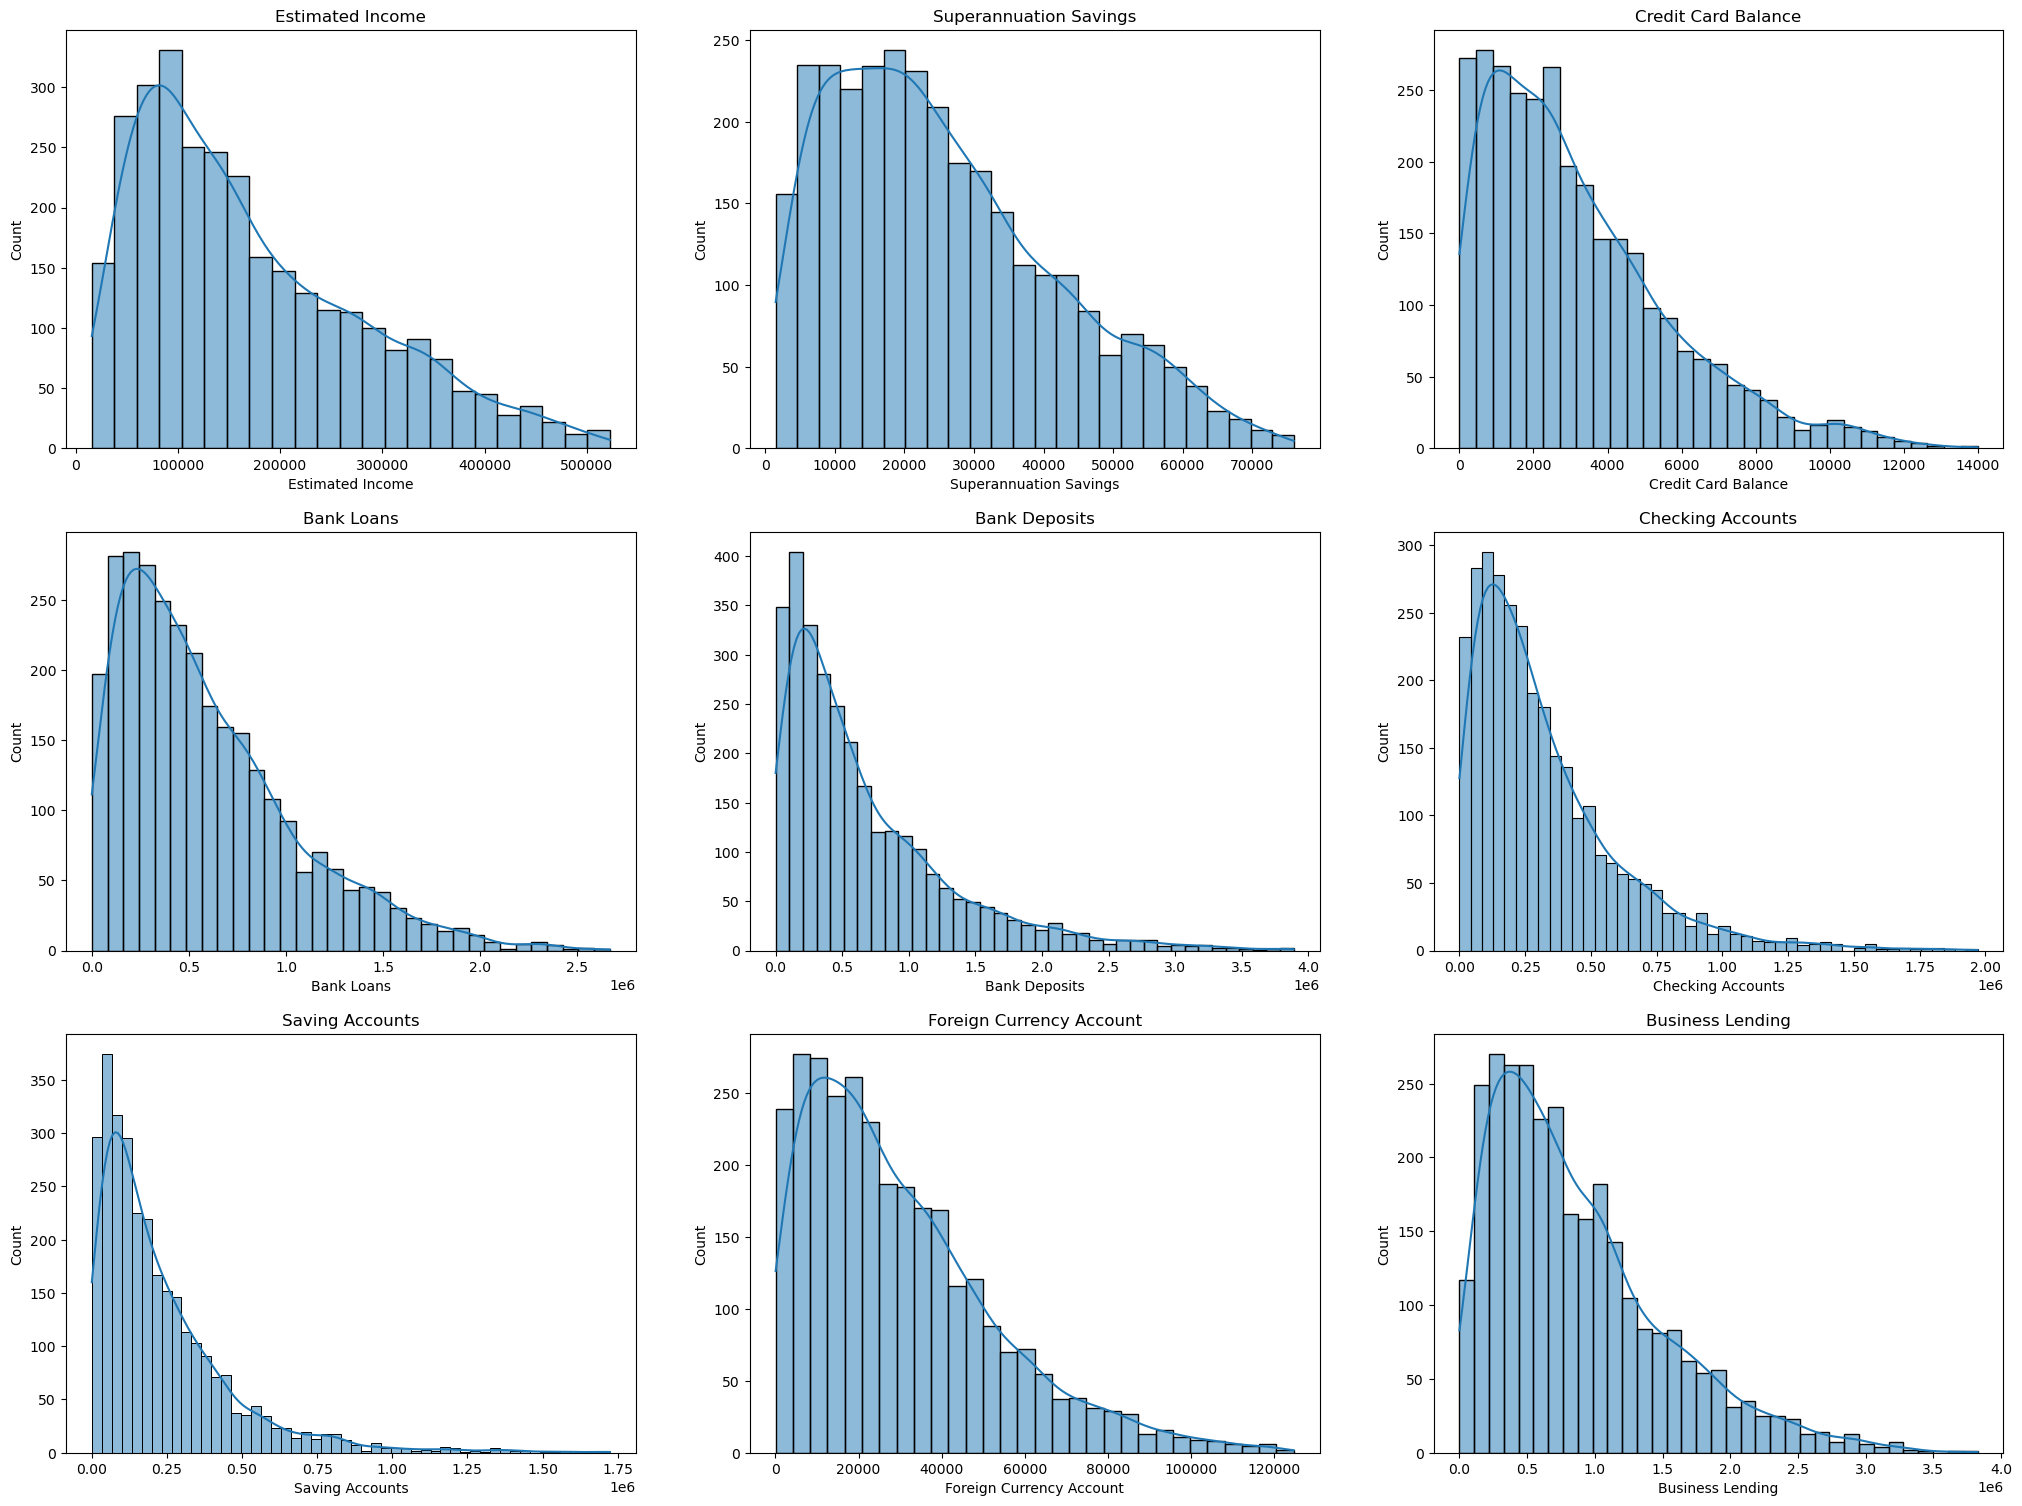

In [111]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(25,25))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.show()



## Heatmaps

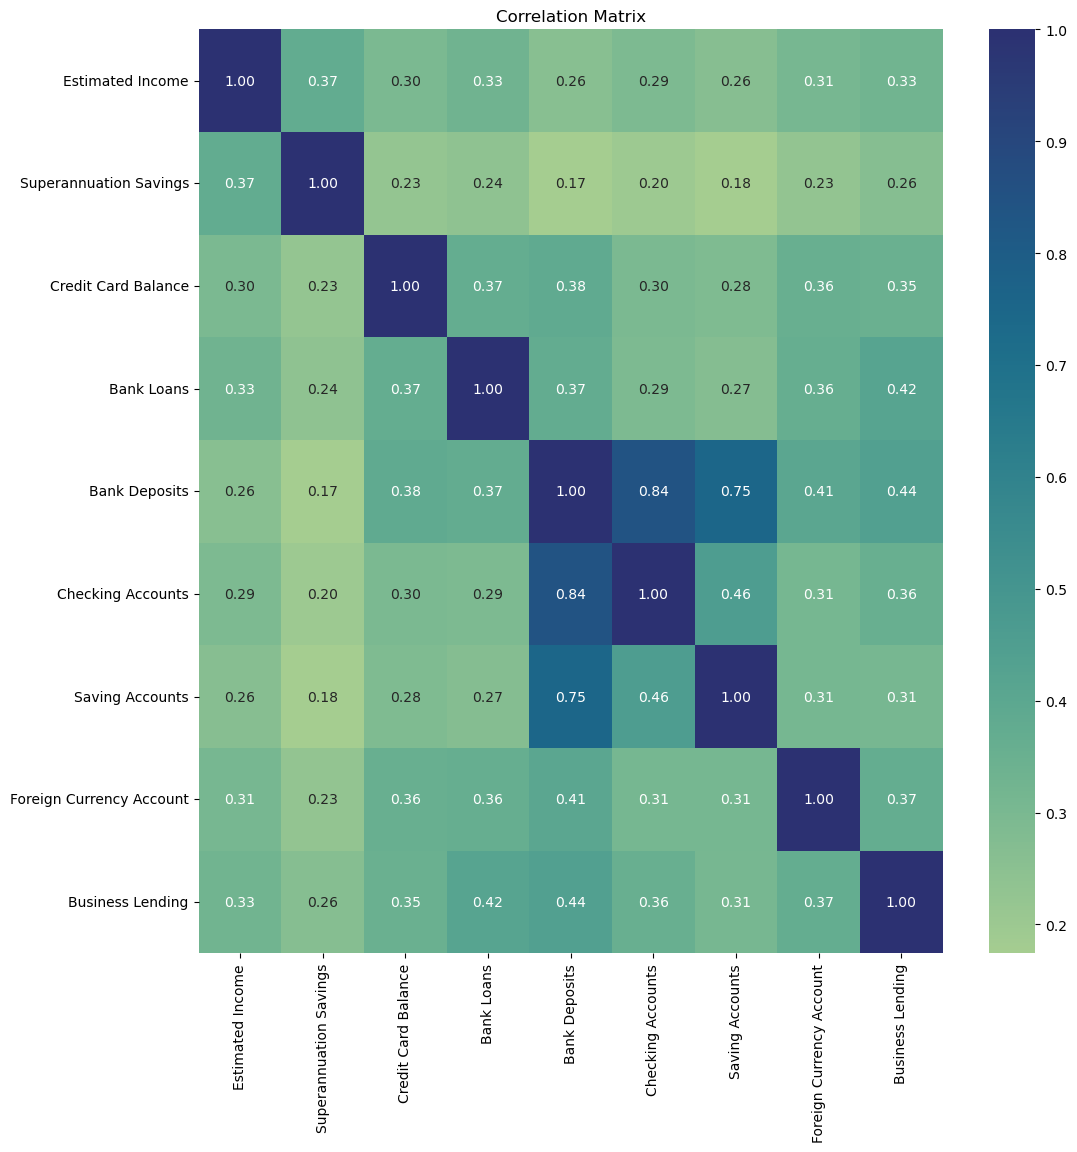

In [132]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [67]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,Estimated Income,Superannuation Savings,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
Estimated Income,1.000000,0.374802,0.298527,0.329926,0.260332,0.291412,0.261299,0.306999,0.328531
Superannuation Savings,0.374802,1.000000,0.225562,0.241457,0.174084,0.198188,0.177132,0.228103,0.264919
Credit Card Balance,0.298527,0.225562,1.000000,0.369509,0.383877,0.298672,0.284696,0.357720,0.351063
Bank Loans,0.329926,0.241457,0.369509,1.000000,0.373155,0.292082,0.268882,0.364391,0.417095
Bank Deposits,0.260332,0.174084,0.383877,0.373155,1.000000,0.844278,0.754744,0.406347,0.441298
Checking Accounts,0.291412,0.198188,0.298672,0.292082,0.844278,1.000000,0.459509,0.312651,0.355904
Saving Accounts,0.261299,0.177132,0.284696,0.268882,0.754744,0.459509,1.000000,0.311465,0.307550
Foreign Currency Account,0.306999,0.228103,0.357720,0.364391,0.406347,0.312651,0.311465,1.000000,0.369749
Business Lending,0.328531,0.264919,0.351063,0.417095,0.441298,0.355904,0.307550,0.369749,1.000000


###### Customers with high deposits tend to also maintain large balances in checking accounts.
###### People with more income slightly tend to have higher credit card usag
###### People using credit cards more are more likely to take loans.
###### Those who earn more tend to save more for retirement — makes sense.
